Vamos construir um modelo de aprendizagem não supervisionado para compreender a diferença deste tipo de algoritmos. Então, vamos
utilizar um algoritmo de tipo K-means para prever o tipo de flor com base numa série de características.

Para isso, deve utilizar-se o seguinte dataset e cumprir as seguintes normas:
https://archive.ics.uci.edu/ml/datasets/iris

• No caso de ter de limpar os dados, não se poderá utilizar as bibliotecas de limpeza, tem de se criar operações de limpeza
com a utilização de funções básicas Python.

• Deve-se mostrar graficamente o conjunto de polos.

Pode-se rever a documentação referente a K-means no seguinte link:
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

# Prever o tipo de flor com base numa série de características
###   Utilizando um algoritmo de tipo K-means

Este notebook tem como objectivo construir um modelo de aprendizagem nao supervisionado para compreender a diferença deste tipo de algoritmo (K-means) para prever o tipo de flor com base numa série de características.

# Carregar o Dataset
Carregar os dados através de https://archive.ics.uci.edu/ml/datasets/iris

In [1]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
iris = fetch_ucirepo(id=53) 
  
# data (as pandas dataframes) 
X = iris.data.features 
y = iris.data.targets 
  
# metadata 
print(iris.metadata) 
  
# variable information 
print(iris.variables) 


{'uci_id': 53, 'name': 'Iris', 'repository_url': 'https://archive.ics.uci.edu/dataset/53/iris', 'data_url': 'https://archive.ics.uci.edu/static/public/53/data.csv', 'abstract': 'A small classic dataset from Fisher, 1936. One of the earliest known datasets used for evaluating classification methods.\n', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 150, 'num_features': 4, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1936, 'last_updated': 'Tue Sep 12 2023', 'dataset_doi': '10.24432/C56C76', 'creators': ['R. A. Fisher'], 'intro_paper': {'ID': 191, 'type': 'NATIVE', 'title': 'The Iris data set: In search of the source of virginica', 'authors': 'A. Unwin, K. Kleinman', 'venue': 'Significance, 2021', 'year': 2021, 'journal': 'Significance, 2021', 'DOI': '1740-9713.01589', 'URL': 'https://www.semanticscholar.org

# 1. Exploração Inicial dos Dados
Vamos começar por explorar o dataset: visualizar algumas amostras, tipos de variáveis e estatísticas básicas para entender melhor os dados.

In [2]:
# Exploração inicial dos dados
print("Amostras das variáveis independentes (features):")
print(X.head())

print("\nAmostras das variáveis alvo (targets):")
print(y.head())

print("\nTipos de variáveis (features):")
print(X.dtypes)

print("\nTipos de variáveis (targets):")
print(y.dtypes)

print("\nEstatísticas descritivas das features:")
print(X.describe())

Amostras das variáveis independentes (features):
   sepal length  sepal width  petal length  petal width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2

Amostras das variáveis alvo (targets):
         class
0  Iris-setosa
1  Iris-setosa
2  Iris-setosa
3  Iris-setosa
4  Iris-setosa

Tipos de variáveis (features):
sepal length    float64
sepal width     float64
petal length    float64
petal width     float64
dtype: object

Tipos de variáveis (targets):
class    object
dtype: object

Estatísticas descritivas das features:
       sepal length  sepal width  petal length  petal width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
mi

# 2. Limpeza Manual dos Dados com Funções Básicas Python
Nesta etapa, vamos identificar e tratar valores ausentes, duplicados ou inconsistentes utilizando a biblioteca Pandas do Python.

In [3]:
import pandas as pd

# Verificar valores ausentes manualmente
missing_features = {}
for col in X.columns:
    missing = sum([1 for v in X[col] if pd.isnull(v)])
    if missing > 0:
        missing_features[col] = missing
print("Valores ausentes por coluna (features X):", missing_features)

missing_targets = {}
for col in y.columns:
    missing = sum([1 for v in y[col] if pd.isnull(v)])
    if missing > 0:
        missing_targets[col] = missing
print("Valores ausentes por coluna (targets Y):", missing_targets)

# Remover linhas com valores ausentes
def remove_missing_rows(X_df, y_df):
    indices_to_keep = []
    for idx in range(len(X_df)):
        row = X_df.iloc[idx]
        target_row = y_df.iloc[idx]
        if not any(pd.isnull(row)) and not any(pd.isnull(target_row)):
            indices_to_keep.append(idx)
    X_clean = X_df.iloc[indices_to_keep].reset_index(drop=True)
    y_clean = y_df.iloc[indices_to_keep].reset_index(drop=True)
    return X_clean, y_clean

X_clean, y_clean = remove_missing_rows(X, y)
print(f"Dados após remoção de linhas com valores ausentes: {X_clean.shape}")

# Remover duplicados manualmente
def remove_duplicates(X_df, y_df):
    seen = set()
    indices_to_keep = []
    for idx in range(len(X_df)):
        row_tuple = tuple(X_df.iloc[idx]) + tuple(y_df.iloc[idx])
        if row_tuple not in seen:
            seen.add(row_tuple)
            indices_to_keep.append(idx)
    X_nodup = X_df.iloc[indices_to_keep].reset_index(drop=True)
    y_nodup = y_df.iloc[indices_to_keep].reset_index(drop=True)
    return X_nodup, y_nodup

X_clean, y_clean = remove_duplicates(X_clean, y_clean)
print(f"Dados após remoção de duplicados: {X_clean.shape}")

Valores ausentes por coluna (features X): {}
Valores ausentes por coluna (targets Y): {}
Dados após remoção de linhas com valores ausentes: (150, 4)
Dados após remoção de duplicados: (147, 4)


# 3. Aplicar K-means nos dados limpos

In [4]:
# Importar K-means do scikit-Learn
from sklearn.cluster import KMeans

# Remover a coluna 'cluster' se já existir (para evitar erro ao rodar várias vezes)
if 'cluster' in X_clean.columns:
    X_clean = X_clean.drop(columns=['cluster'])

# Aplicar K-means (3 clusters para as 3 espécies de flores)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_clean)

# Adicionar os rótulos dos clusters ao DataFrame
X_clean['cluster'] = kmeans.labels_

# 4. Mostrar graficamente o conjunto de polos (centroides dos clusters)

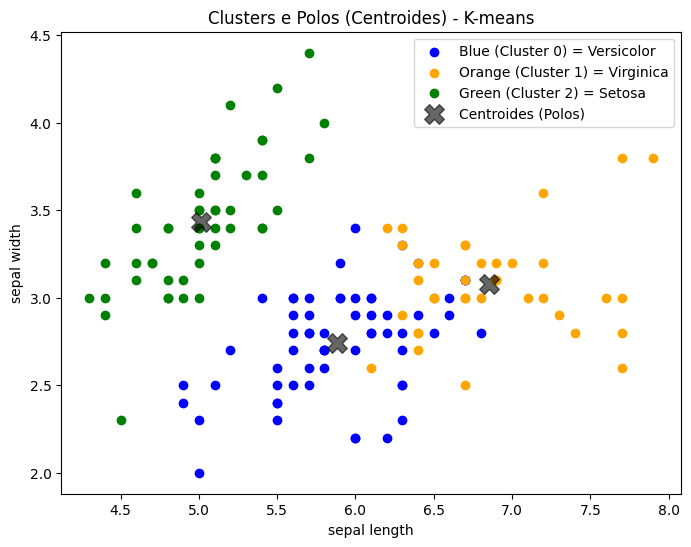

In [11]:
import matplotlib.pyplot as plt

# Exemplo de mapeamento (ajuste conforme sua matriz de confusão)
cluster_to_species = {
    0: "Versicolor",      # Azul
    1: "Virginica",   # Laranja
    2: "Setosa"   # Verde
}

colors = ['blue', 'orange', 'green']

plt.figure(figsize=(8, 6))
for cluster in range(3):
    plt.scatter(
        X_clean[X_clean['cluster'] == cluster].iloc[:, 0],
        X_clean[X_clean['cluster'] == cluster].iloc[:, 1],
        label=f"{colors[cluster].capitalize()} (Cluster {cluster}) = {cluster_to_species[cluster]}",
        color=colors[cluster]
    )

# Centroides (polos)
centers = kmeans.cluster_centers_
plt.scatter(
    centers[:, 0], centers[:, 1],
    c='black', s=200, alpha=0.6, marker='X', label='Centroides (Polos)'
)

plt.xlabel(X_clean.columns[0])
plt.ylabel(X_clean.columns[1])
plt.title('Clusters e Polos (Centroides) - K-means')
plt.legend()
plt.show()

In [9]:
# Indicadores adicionais para avaliação dos clusters

from sklearn.metrics import confusion_matrix, silhouette_score
import numpy as np

# Converter rótulos verdadeiros para valores numéricos
true_labels = pd.factorize(y_clean.iloc[:, 0].values)[0]
pred_labels = X_clean['cluster'].values

conf_matrix = confusion_matrix(true_labels, pred_labels)
print("Matriz de Confusão entre clusters e espécies reais:")
print(conf_matrix)

# 2. Inertia (soma das distâncias quadradas dentro dos clusters)
print(f"Inertia (Soma das distâncias quadradas dentro dos clusters): {kmeans.inertia_:.2f}")

# 3. Silhouette Score
sil_score = silhouette_score(X_clean.drop(columns=['cluster']), X_clean['cluster'])
print(f"Silhouette Score: {sil_score:.2f}")

Matriz de Confusão entre clusters e espécies reais:
[[ 0  0 48]
 [47  3  0]
 [13 36  0]]
Inertia (Soma das distâncias quadradas dentro dos clusters): 77.92
Silhouette Score: 0.55


# Análise dos Clusters

A matriz de confusão obtida foi:
```
[[ 0  0 48]
 [47  3  0]
 [13 36  0]]
```
Cada linha representa uma espécie real (na ordem: Setosa, Versicolor, Virginica) e cada coluna representa um cluster (Cluster 0 = azul, Cluster 1 = laranja, Cluster 2 = verde).

**Cluster 0 (Azul):**
- Contém principalmente amostras da espécie Versicolor (47) e algumas de Virginica (13).
- Não contém amostras de Setosa.
- Este cluster mistura Versicolor e Virginica, mostrando que essas espécies têm características semelhantes para o K-means.

**Cluster 1 (Laranja):**
- Contém principalmente amostras de Virginica (36) e algumas de Versicolor (3).
- Não contém amostras de Setosa.
- Este cluster representa principalmente a espécie Virginica, mas com alguma confusão com Versicolor.

**Cluster 2 (Verde):**
- Contém todas as amostras de Setosa (48).
- Não contém amostras de Versicolor ou Virginica.
- O cluster verde separou perfeitamente a espécie Setosa, mostrando que ela é facilmente distinguível pelas suas características.

## Indicadores Quantitativos

- **Inertia:** 77.92 — indica que os pontos estão relativamente próximos dos seus centroides, sugerindo boa compactação dos clusters.
- **Silhouette Score:** 0.55 — indica uma separação razoável entre os clusters, mas não perfeita, devido à sobreposição entre Versicolor e Virginica.

## Conclusão

O K-means conseguiu identificar claramente a espécie Setosa (cluster verde), enquanto as espécies Versicolor e Virginica apresentaram sobreposição nos clusters azul e laranja. Isso reflete a maior semelhança entre as características dessas duas espécies. O exercício demonstra a utilidade do K-means para identificar padrões em dados não rotulados, mas também evidencia as limitações do método quando as classes possuem